# Oscars Dataset 2018
**source**:
### https://www.kaggle.com/kikun1234/big-ml-oscars-dataset-2018



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image

In [2]:
Image(url= "https://github.com/Edens25/oscar_final/raw/main/oscar_pic.jpg", width=650, height=650)

In [3]:
url = "https://raw.githubusercontent.com/Edens25/oscar_final/main/oscar_fill_final.csv"
df = pd.read_csv(url ,encoding= 'unicode_escape')
df.head(3)

,year,movie,movie_id,certificate,duration,Unnamed: 5,genre,rate,metascore,synopsis,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,NaN,Comedy,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,NaN,Animation,7.0,88.0,When a cockerel apparently flies into a chicke...,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,NaN,Action,5.7,40.0,A group of astronauts gain superpowers after a...,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0


**Displays the column types**

In [4]:
df.dtypes

year                                                           int64
movie                                                         object
movie_id                                                      object
certificate                                                   object
duration                                                       int64
                                                              ...   
Los_Angeles_Film_Critics_Association_nominated_categories     object
release_date.year                                            float64
release_date.month                                           float64
release_date.day-of-month                                    float64
release_date.day-of-week                                     float64
Length: 120, dtype: object

**Presenting the connection between the various contests as can be seen the strongest connection is between Oscar_nominated and BAFTA_nominated meaning that whoever is nominated for an Oscar will usually also be nominated for BAFTA**

In [5]:
awards_data= df.iloc[:,34:54:4]
corrs = awards_data.corr(method='spearman')
corrs.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '15pt'})

,Oscar_nominated,Golden_Globes_nominated,BAFTA_nominated,Screen_Actors_Guild_nominated,Critics_Choice_nominated
Oscar_nominated,1.000000,0.670240,0.696457,0.556975,0.672058
Golden_Globes_nominated,0.670240,1.000000,0.631583,0.584449,0.681953
BAFTA_nominated,0.696457,0.631583,1.000000,0.510202,0.661168
Screen_Actors_Guild_nominated,0.556975,0.584449,0.510202,1.000000,0.578263
Critics_Choice_nominated,0.672058,0.681953,0.661168,0.578263,1.000000


**Presenting the distribution of Oscar films according to their genre**

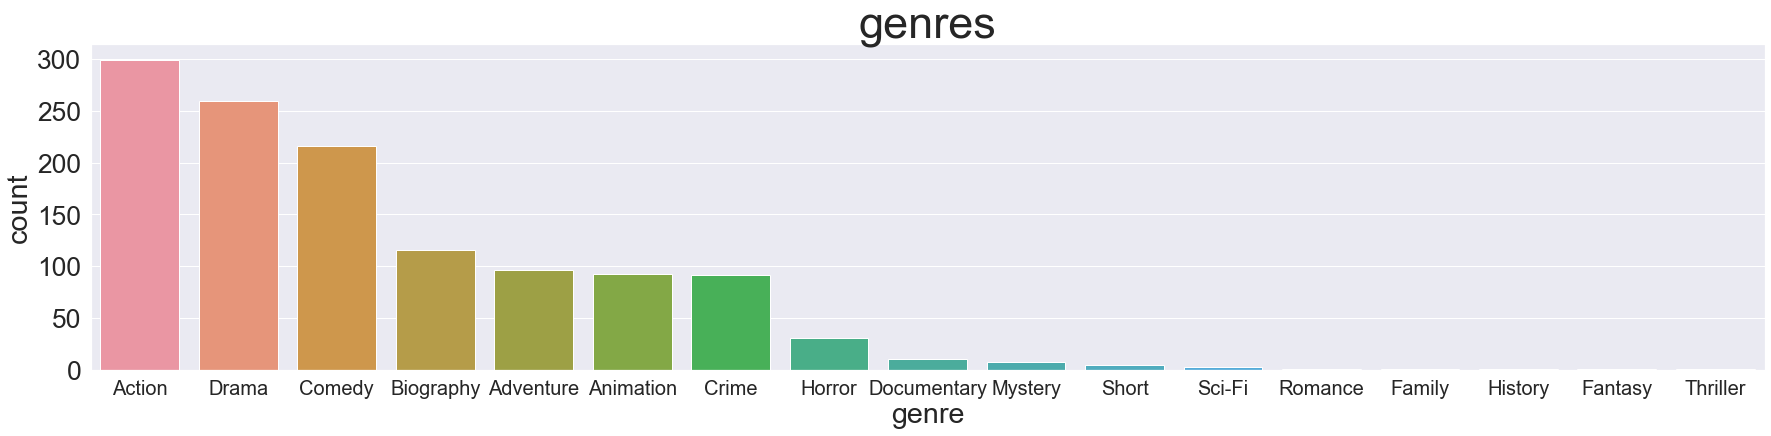

In [6]:
fig=plt.figure(1, figsize = (30,6))
sns.set(font_scale=2.4)
plt.title("genres",fontsize=45)
sns.set(style='darkgrid')
ax = sns.countplot(x="genre", data=df,order = df['genre'].value_counts().index)
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.xticks(fontsize=20)
plt.show()

**Displays the average and standard deviations of the films according to their rating. It can be seen that even though the average of the action genre is lower compared to most other averages, the movie with the highest rating is in the action genre.**

<AxesSubplot:title={'center':'Rating relative to genre'}, xlabel='genre', ylabel='rate'>

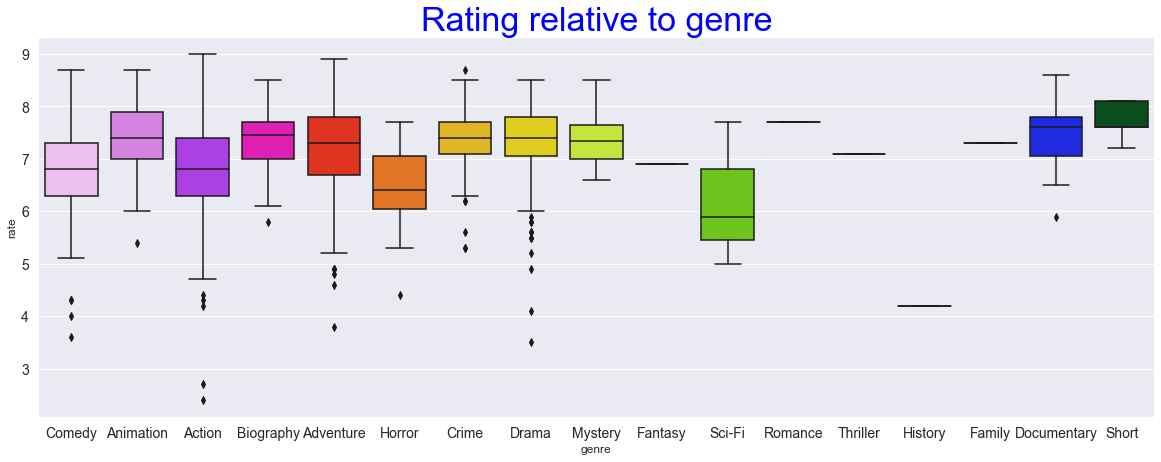

In [7]:
plt.figure(figsize = (20,7))
sns.set(style='darkgrid')
plt.title('Rating relative to genre',color = 'blue',fontsize = 34)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(x='genre',y='rate',data=df,palette='gist_ncar_r')

**Revenue presentation in relation to the film genre. It can be seen that in the action genre there is a small amount of movies above the standard deviation that have gained very large revenues compared to the other movies in the same genre**

<AxesSubplot:title={'center':'gross relative to genre'}, xlabel='genre', ylabel='gross'>

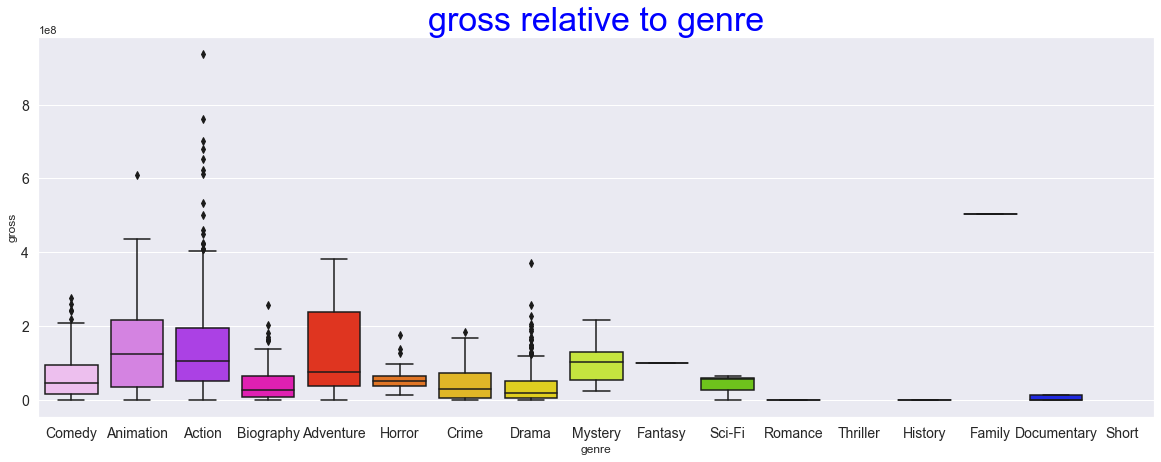

In [8]:
plt.figure(figsize = (20,7))
sns.set(style='darkgrid')
plt.title('gross relative to genre',color = 'blue',fontsize = 34)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(x='genre',y='gross',data=df,palette='gist_ncar_r')

**Displays the length of the film in relation to the genre. Documentary films can be seen much shorter than films of any other genre**

<AxesSubplot:title={'center':'duration relative to genre'}, xlabel='genre', ylabel='duration'>

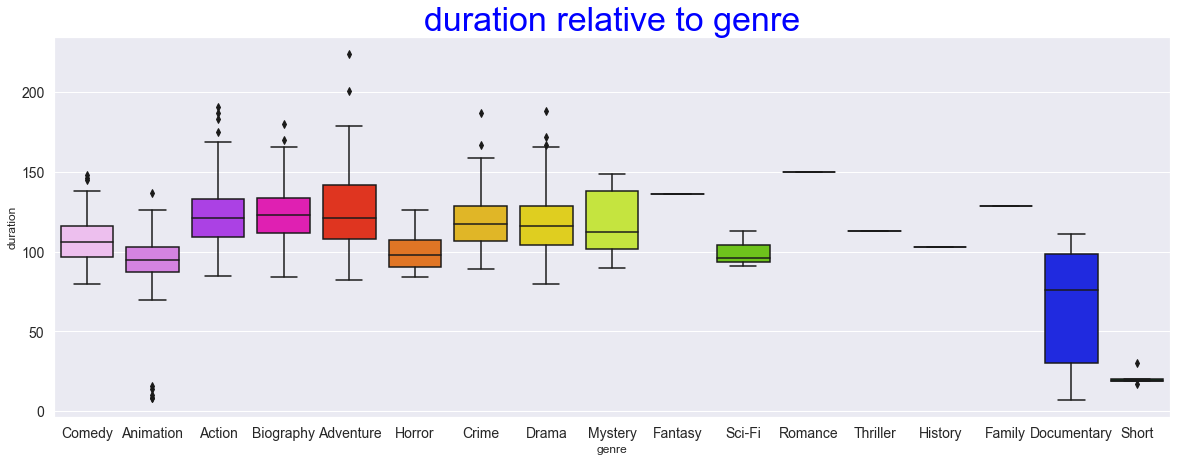

In [9]:
plt.figure(figsize = (20,7))
sns.set(style='darkgrid')
plt.title('duration relative to genre',color = 'blue',fontsize = 34)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.boxplot(x='genre',y='duration',data=df,palette='gist_ncar_r')

**Presenting the distribution of the age of watching movies at the Oscars, as you can see, most of the films nominated for the Oscars and the various competitions are intended for teenagers.**

<AxesSubplot:title={'center':'certificate'}, xlabel='certificate', ylabel='count'>

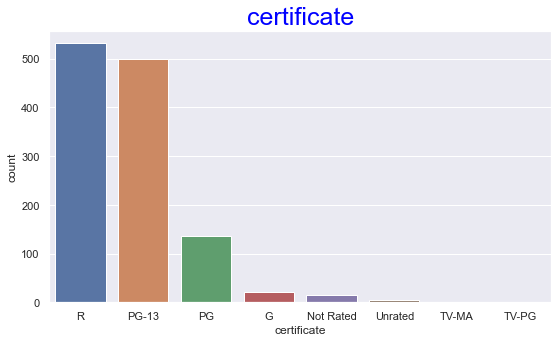

In [10]:
fig = plt.subplots(figsize=(9,5))
sns.set()
plt.title('certificate',fontsize=25,color = 'blue')
sns.countplot(x="certificate", data=df,order = df['certificate'].value_counts().index)

**Presenting upward trends over the years relative to average revenue relative to average rating. As can be seen there has been an increase in the amount of revenue and the level of rating since 2010 we think it is related to the fact that awareness of the movies and the demand has increased and therefore the revenue and rating of the movies has increased**

<AxesSubplot:title={'center':'rate in relation to years'}, xlabel='year'>

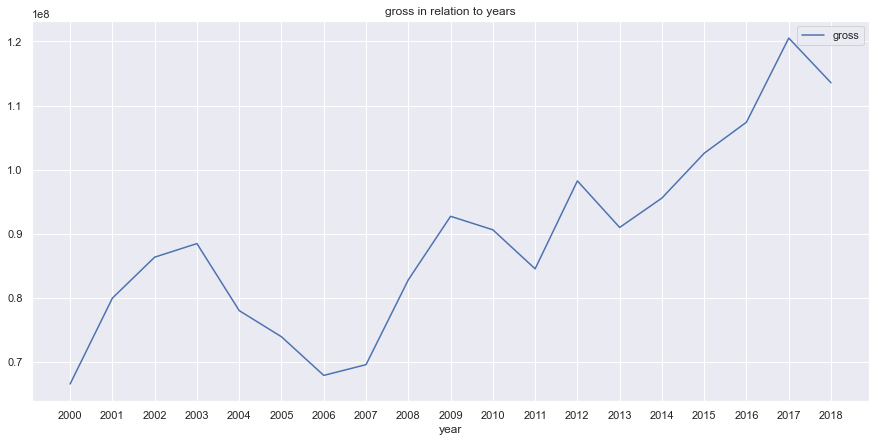

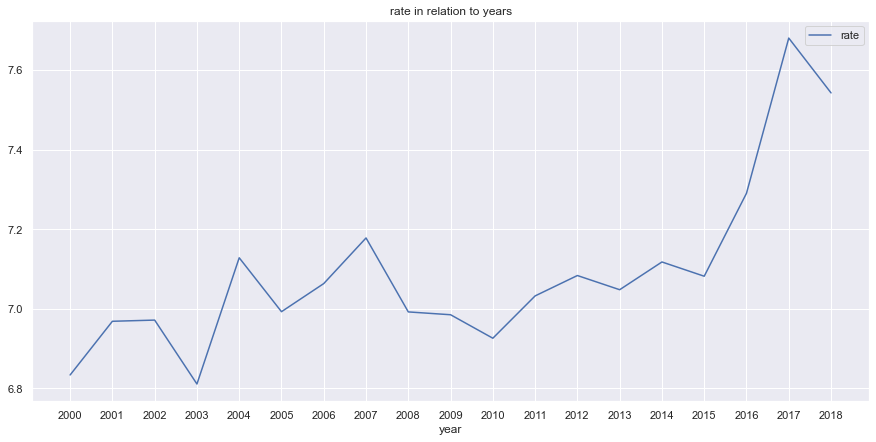

In [11]:
pd.pivot_table(
    df,index = ['year'], values = ['gross']
).sort_values(by=['year'], ascending=False
).plot(figsize=(15,7),xticks=(2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018),title='gross in relation to years')
pd.pivot_table(
    df,index = ['year'], values = ['rate']
).sort_values(by=['year'], ascending=False
 ).plot(figsize=(15,7),xticks=(2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018),title='rate in relation to years')

**Adding data to display information about the award winners**

In [12]:
url = 'https://github.com/XthebigdoX/oscarfinal/raw/main/oscar_win.xls'
oscar_win= pd.read_csv(url)
oscar_win.head()

,birthplace,race_ethnicity,religion,sexual_orientation,year_of_award
0,"Chisinau, Moldova",White,Na,Straight,1927
1,"Glasgow, Scotland",White,Na,Straight,1930
2,"Chisinau, Moldova",White,Na,Straight,1931
3,"Chicago, Il",White,Na,Straight,1932
4,"Salt Lake City, Ut",White,Roman Catholic,Straight,1933


**Adding a small file outlining the age, sexual orientation, origin and more of the Oscar winners and presenting the distribution of religion among the winners**

Text(0.5, 1.0, 'Distribution of religions')

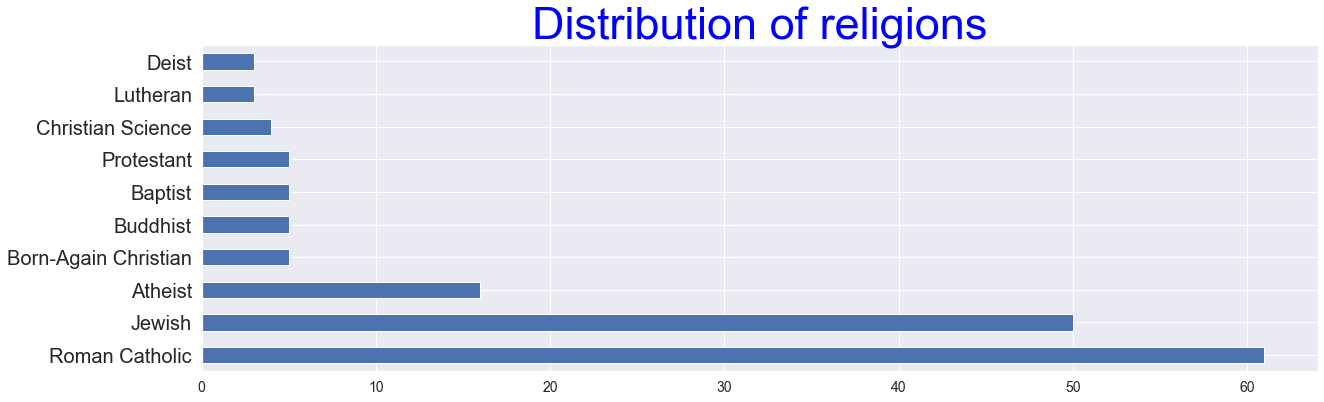

In [13]:
oscar_reli=oscar_win[oscar_win['religion']!="Na"]
oscar_reli['religion'].value_counts()[:10].plot(kind='barh',figsize=(20,6))
plt.yticks(fontsize=20)
plt.xticks(fontsize=14)
plt.title('Distribution of religions',color = 'blue',fontsize = 45)

**Taking the two most common religions among Oscar winners and presenting them in relation to their general population in the world**

In [14]:
oscar_reli=oscar_win[oscar_win['religion']!="Na"]
top_2_reli=oscar_reli['religion'].value_counts().nlargest(2).to_dict()
R_C_number_wins=list(top_2_reli.items())[0][1]
J_number_wins=list(top_2_reli.items())[1][1]

In [15]:
total_jewish=int(17000000)
total_R_C=int(1200000000)
J_to_total=J_number_wins/total_jewish
R_C_to_total=R_C_number_wins/total_R_C

In [16]:
df1={'religion':['jewish','Roman Catholic'],'number_of':[J_to_total,R_C_to_total]}
data_best=pd.DataFrame(df1)

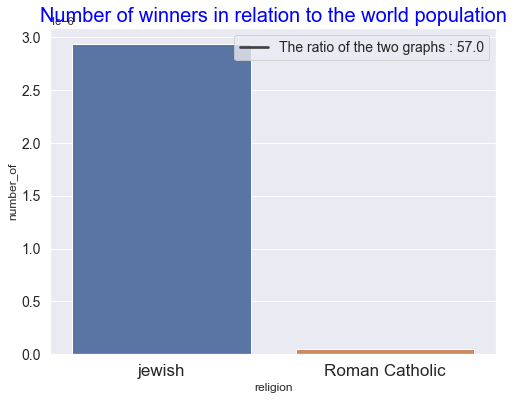

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
plt.title('Number of winners in relation to the world population',color = 'blue',fontsize = 20)
sns.barplot(x="religion", y='number_of',data=data_best)
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
plt.legend(["The ratio of the two graphs : "+str(J_to_total//R_C_to_total)],prop={'size': 14})
plt.show()

**As you can see, the number of Jewish winners in relation to the global Jewish population is 57 times greater! From the number of winners from the Catholic religion in relation to the population of Catholics in the world**

In [18]:
Image(url= "https://cashcow-cdn.azureedge.net/images/cf4829b2-bcd9-4ae3-87e0-dd9aa6eaad26_500.jpg", width=350, height=350)